
# **Telecom X: Análisis de Evasión de Clientes**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

**Objetivo**: Buscar, tratar y realizar un análisis exploratorio de los datos de la empresa (ETL)





## Extracción

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

df = pd.read_json(url)

df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## Transformación

In [3]:
pd.set_option('display.max_columns', None)

### Eliminando identación

In [4]:
col_sin_normalizar = ['customer', 'phone', 'internet', 'account']

df_final = df.drop(columns=col_sin_normalizar)

for col in col_sin_normalizar:
  df_temp = pd.json_normalize(df[col])
  df_final = pd.concat([df_final, df_temp], axis=1)

df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Normalizando columnas

In [6]:
import re

def to_snake_case(name):
  name = name.replace('.', '')
  s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
  return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df_final.columns = [to_snake_case(col) for col in df_final.columns]

df_final

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Corrigiendo Dtypes

In [7]:
df_final['charges_total'] = pd.to_numeric(df_final['charges_total'], errors='coerce')

df_final['charges_total'] = df_final['charges_total'].fillna(0)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

### Nueva columna: charges_daily

In [8]:
df_final['charges_daily'] = round(df_final['charges_monthly']/30, 2)
df_final

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,charges_daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [9]:
cols = list(df_final.columns)

cols.insert(cols.index('charges_monthly'), cols.pop(cols.index('charges_daily')))

df_final = df_final[cols]

df_final

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_daily,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,1.84,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1.68,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,2.26,67.85,4627.65


### Tratamiento de Yes y No por 1 y 0

In [10]:
col_booleanas = ['churn', 'partner', 'dependents', 'phone_service',
                'multiple_lines', 'online_security', 'online_backup',
                'device_protection', 'tech_support', 'streaming_tv',
                'streaming_movies', 'paperless_billing'
                ]

mapeo = {'Yes': 1, 'No': 0}

df_final[col_booleanas] = df_final[col_booleanas].replace(mapeo);

df_final

C:\Users\juan-\AppData\Local\Temp\ipykernel_24304\1004448496.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col_booleanas] = df_final[col_booleanas].replace(mapeo);


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_daily,charges_monthly,charges_total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,2.19,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,2.00,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,2.46,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,3.27,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,1.84,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,1.68,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,2.26,67.85,4627.65


In [11]:
df_final['churn'].unique()

array([0, 1, ''], dtype=object)

In [12]:
vacios = (df_final['churn'] == '').sum()
print(f"Registros con churn vacío: {vacios}")

df_final = df_final[df_final['churn'] != ''].copy()
df_final

Registros con churn vacío: 224


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_daily,charges_monthly,charges_total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,2.19,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,2.00,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,2.46,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,3.27,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,1.84,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,1.68,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,2.26,67.85,4627.65


In [13]:
df_final['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

## Análisis

### Análisis descriptivo

In [14]:
df_final.describe()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_daily,charges_monthly,charges_total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,2.158675,64.761692,2279.734304
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,1.003088,30.090047,2266.794470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.180000,35.500000,398.550000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,2.340000,70.350000,1394.550000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.990000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,3.960000,118.750000,8684.800000


### Distribución de evasión

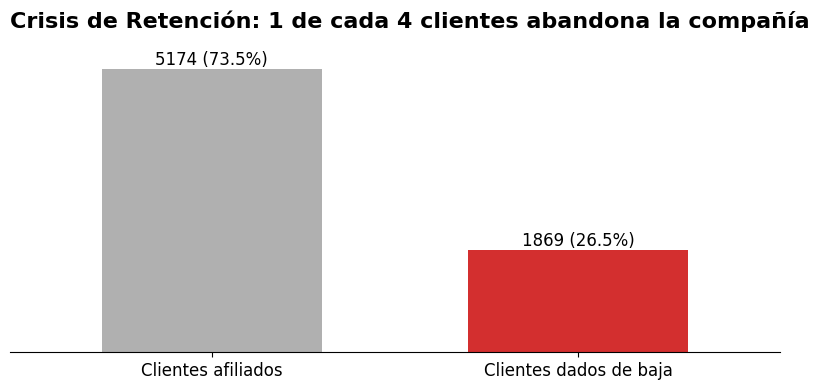

In [20]:
import matplotlib.pyplot as plt

counts = df_final['churn'].value_counts()

total = counts.sum()

plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(figsize=(8, 4))

colors = ['#B0B0B0', '#D32F2F']
counts.plot(kind='bar', ax=ax, color=colors, width=0.6)

for p in ax.patches:
    value = int(p.get_height())
    percentage = value / total * 100
    ax.annotate(
        f'{value} ({percentage:.1f}%)',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=12
    )

ax.set_title('Crisis de Retención: 1 de cada 4 clientes abandona la compañía',
             fontsize=16, fontweight='bold', loc='left', pad=20)
ax.set_ylabel('Total de Clientes', fontsize=12)
ax.set_xlabel('')

ax.set_xticklabels(['Clientes afiliados', 'Clientes dados de baja'],
                   rotation=0, ha='center', fontsize=12)

ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
# Guardar la figura como PNG
fig.savefig('./assets/evasion_clientes.png', dpi=300, bbox_inches='tight')
plt.show()

### Evasión por variables categóricas

In [16]:
categorical_cols = [
    'internet_service',
    'contract',
    'payment_method',
    'senior_citizen',
    'partner',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
]

for col in categorical_cols:
  print(f"\n--- Análisis de Evasión por {col} ---")
  table = pd.crosstab(df_final[col], df_final['churn'], normalize='index') * 100
  print(round(table,2))


--- Análisis de Evasión por internet_service ---
churn                 0      1
internet_service              
DSL               81.04  18.96
Fiber optic       58.11  41.89
No                92.60   7.40

--- Análisis de Evasión por contract ---
churn               0      1
contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83

--- Análisis de Evasión por payment_method ---
churn                          0      1
payment_method                         
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11

--- Análisis de Evasión por senior_citizen ---
churn               0      1
senior_citizen              
0               76.39  23.61
1               58.32  41.68

--- Análisis de Evasión por partner ---
churn        0      1
partner              
0        67.04  32.96
1        80.34  19.66

--- Análisis de Evasión po

In [17]:
print('Primeras hipótesis – Análisis Categórico:')

print('1. Servicio de Internet:')
print('Los clientes con servicio de fibra óptica presentan una tasa de evasión significativamente mayor. '
      'Esto sugiere que, al tratarse de un servicio de mayor costo, los usuarios tienen expectativas más altas '
      'en términos de calidad y estabilidad, y cualquier falla o percepción de bajo valor puede acelerar la decisión de abandono.')

print('2. Tipo de Contrato:')
print('Los clientes con contratos mensuales muestran una mayor propensión a la evasión debido a la ausencia de compromisos a largo plazo. '
      'La baja barrera de salida facilita el cambio hacia otras empresas ante insatisfacción, mejores ofertas o falta de diferenciación del servicio.')

print('3. Método de pago:')
print('El uso de métodos de pago manuales, especialmente el cheque electrónico, se asocia con mayores tasas de churn. '
      'Esto podría indicar una mayor conciencia mensual del gasto, mayor fricción en el proceso de pago o un menor nivel de fidelización.')

print('4. Adultos mayores:')
print('Los clientes adultos mayores presentan una tasa de evasión superior, lo que podría estar relacionado con dificultades en el uso de la tecnología, '
      'menor aprovechamiento del servicio o una percepción de que el costo no se justifica frente al beneficio recibido.')

print('5. Servicios adicionales:')
print('La contratación de servicios adicionales como seguridad en línea, protección de dispositivos y soporte técnico se asocia con una menor evasión. '
      'Estos servicios parecen incrementar la percepción de valor y generar una mayor dependencia del ecosistema de la empresa.')

print('La evasión de clientes está principalmente asociada a la falta de compromiso contractual, altas expectativas no satisfechas en servicios premium y menor percepción de valor en clientes sin servicios adicionales.')


Primeras hipótesis – Análisis Categórico:
1. Servicio de Internet:
Los clientes con servicio de fibra óptica presentan una tasa de evasión significativamente mayor. Esto sugiere que, al tratarse de un servicio de mayor costo, los usuarios tienen expectativas más altas en términos de calidad y estabilidad, y cualquier falla o percepción de bajo valor puede acelerar la decisión de abandono.
2. Tipo de Contrato:
Los clientes con contratos mensuales muestran una mayor propensión a la evasión debido a la ausencia de compromisos a largo plazo. La baja barrera de salida facilita el cambio hacia otras empresas ante insatisfacción, mejores ofertas o falta de diferenciación del servicio.
3. Método de pago:
El uso de métodos de pago manuales, especialmente el cheque electrónico, se asocia con mayores tasas de churn. Esto podría indicar una mayor conciencia mensual del gasto, mayor fricción en el proceso de pago o un menor nivel de fidelización.
4. Adultos mayores:
Los clientes adultos mayores pre

### Evasion por variables númericas

In [18]:
df_final['charges_monthly_seg'] = pd.qcut(
    df_final['charges_monthly'],
    q=4,
    labels=['Bajo', 'Medio-bajo', 'Medio-alto', 'Alto']
)

df_final['charges_total_seg'] = pd.qcut(
    df_final['charges_total'],
    q=4,
    labels=['Bajo', 'Medio-bajo', 'Medio-alto', 'Alto']
)

df_final['tenure_seg'] = pd.cut(
    df_final['tenure'],
    bins=[0, 12, 36, 60, df_final['tenure'].max()],
    labels=['Nuevo', 'Intermedio', 'Leal', 'Muy leal'],
    include_lowest=True
)

for col in ['charges_monthly_seg', 'charges_total_seg', 'tenure_seg']:
    print(f"\n--- Análisis de Evasión por {col} ---")
    print(
        round(
            pd.crosstab(df_final[col], df_final['churn'], normalize='index') * 100,
            2
        )
    )



--- Análisis de Evasión por charges_monthly_seg ---
churn                    0      1
charges_monthly_seg              
Bajo                 88.76  11.24
Medio-bajo           75.42  24.58
Medio-alto           62.49  37.51
Alto                 67.12  32.88

--- Análisis de Evasión por charges_total_seg ---
churn                  0      1
charges_total_seg              
Bajo               56.75  43.25
Medio-bajo         74.60  25.40
Medio-alto         76.99  23.01
Alto               85.52  14.48

--- Análisis de Evasión por tenure_seg ---
churn           0      1
tenure_seg              
Nuevo       52.56  47.44
Intermedio  74.46  25.54
Leal        83.38  16.62
Muy leal    93.39   6.61


In [19]:
print('Primeras hipótesis – Análisis Numérico:')

print('1. Cargo mensual:')
print('Los clientes con cargos mensuales más elevados presentan una mayor tasa de evasión, especialmente en los segmentos medio-alto y alto. '
      'Esto sugiere que un mayor costo mensual incrementa las expectativas sobre el servicio y la sensibilidad al precio, por lo que '
      'cuando el valor percibido no justifica el monto pagado, aumenta la probabilidad de abandono.')

print('2. Cargo total acumulado:')
print('Los clientes con bajo gasto total histórico muestran una mayor propensión a la evasión. '
      'Esto indica que una menor inversión acumulada reduce el costo de cambio percibido, '
      'facilitando la decisión de abandonar el servicio frente a cualquier nivel de insatisfacción.')

print('3. Antigüedad del cliente:')
print('La evasión disminuye de manera significativa a medida que aumenta la antigüedad del cliente. '
      'Los clientes nuevos presentan las tasas más altas de churn, lo que sugiere que las primeras etapas del ciclo de vida '
      'son críticas para la retención y que cualquier fricción inicial puede acelerar la desafiliación.')

print('La evasión de clientes está fuertemente asociada al ciclo de vida del cliente y a la percepción de valor económico: '
      'clientes nuevos, con bajo gasto acumulado y cargos mensuales elevados concentran el mayor riesgo de churn.')


Primeras hipótesis – Análisis Numérico:
1. Cargo mensual:
Los clientes con cargos mensuales más elevados presentan una mayor tasa de evasión, especialmente en los segmentos medio-alto y alto. Esto sugiere que un mayor costo mensual incrementa las expectativas sobre el servicio y la sensibilidad al precio, por lo que cuando el valor percibido no justifica el monto pagado, aumenta la probabilidad de abandono.
2. Cargo total acumulado:
Los clientes con bajo gasto total histórico muestran una mayor propensión a la evasión. Esto indica que una menor inversión acumulada reduce el costo de cambio percibido, facilitando la decisión de abandonar el servicio frente a cualquier nivel de insatisfacción.
3. Antigüedad del cliente:
La evasión disminuye de manera significativa a medida que aumenta la antigüedad del cliente. Los clientes nuevos presentan las tasas más altas de churn, lo que sugiere que las primeras etapas del ciclo de vida son críticas para la retención y que cualquier fricción inicia

## Informe Final – Análisis de Evasión de Clientes (Churn)

**Empresa:** Telecom X

## 1️⃣ Introducción

La evasión de clientes (*Churn*) representa uno de los principales desafíos estratégicos para Telecom X, ya que impacta directamente en los ingresos, la estabilidad del negocio y los costos de adquisición de nuevos clientes.
El objetivo de este análisis es **identificar los factores más relevantes asociados a la deserción de clientes**, utilizando información histórica de la empresa, con el fin de **comprender los patrones de comportamiento**, detectar perfiles de alto riesgo y **proponer acciones orientadas a mejorar la retención**.

El estudio se centra en el análisis de variables categóricas y numéricas, evaluando su asociación con la variable `churn`, donde:

* `churn = 1` representa clientes que abandonaron el servicio.
* `churn = 0` representa clientes que permanecen activos.

## 2️⃣ Limpieza y Tratamiento de Datos

El conjunto de datos proporcionado por Telecom X fue importado y sometido a un proceso de limpieza y preparación para garantizar la calidad del análisis. Las principales acciones realizadas fueron:

* Validación de tipos de datos (variables categóricas y numéricas).
* Revisión de valores nulos y registros inconsistentes.
* Conversión de la variable `churn` a formato binario para facilitar el análisis.
* Separación explícita entre:

  * **Variables categóricas** (género, contrato, servicios, método de pago, etc.).
  * **Variables numéricas** (cargo mensual, cargo total acumulado y antigüedad).
* Segmentación de variables numéricas continuas en rangos significativos (cuartiles y tramos de negocio), con el fin de facilitar su interpretación y evitar ruido estadístico.

Este tratamiento permitió trabajar con datos coherentes y comparables, asegurando la validez de los resultados obtenidos.

## 3️⃣ Análisis Exploratorio de Datos (EDA)

### 📌 Visión general del Churn

Del total de clientes analizados:

* **73.5% permanecen afiliados**
* **26.5% se dieron de baja**

Esto implica que **aproximadamente 1 de cada 4 clientes abandona la compañía**, lo que evidencia un problema relevante de retención.

### 🔹 Análisis Categórico

#### 🔸 Tipo de contrato

* **Month-to-month:** 42.71% churn
* **One year:** 11.27% churn
* **Two year:** 2.83% churn

➡️ El tipo de contrato es uno de los factores más influyentes. Los contratos mensuales presentan una evasión casi **15 veces mayor** que los contratos de dos años.

#### 🔸 Servicio de Internet

* **Fiber optic:** 41.89% churn
* **DSL:** 18.96% churn
* **Sin internet:** 7.40% churn

➡️ Los clientes con fibra óptica muestran la mayor tasa de evasión, lo que sugiere **altas expectativas no satisfechas** en un servicio de mayor costo.

#### 🔸 Método de pago

* **Electronic check:** 45.29% churn
* **Pagos automáticos:** ~15–17% churn

➡️ Los métodos de pago manuales se asocian con una mayor evasión, posiblemente por mayor fricción y revisión constante del gasto.

#### 🔸 Servicios adicionales (Soporte y Seguridad)

* Sin soporte técnico: ~41.6% churn
* Con soporte técnico: ~15.2% churn

➡️ La contratación de servicios adicionales reduce el churn en casi **tres veces**, incrementando la percepción de valor.

### 🔹 Análisis Numérico (segmentado)

#### 🔸 Antigüedad del cliente (Tenure)

* **Clientes nuevos:** 47.44% churn
* **Intermedios:** 25.54% churn
* **Leales:** 16.62% churn
* **Muy leales:** 6.61% churn

➡️ La evasión disminuye de forma progresiva conforme aumenta la antigüedad, concentrándose el mayor riesgo en los primeros meses.

#### 🔸 Cargo mensual

* Bajo: 11.24% churn
* Medio-alto: 37.51% churn
* Alto: 32.88% churn

➡️ Los cargos mensuales más altos incrementan la probabilidad de evasión cuando el valor percibido no justifica el precio.

#### 🔸 Cargo total acumulado

* Bajo gasto histórico: 43.25% churn
* Alto gasto histórico: 14.48% churn

➡️ A mayor inversión acumulada, menor probabilidad de abandono, debido al aumento del costo de cambio percibido.

## 4️⃣ Conclusiones e Insights

Del análisis realizado se desprenden los siguientes hallazgos clave:

* La evasión de clientes **no es aleatoria**, sino que responde a patrones claros asociados al tipo de contrato, antigüedad, nivel de gasto y servicios contratados.
* Los clientes **nuevos**, con **contratos mensuales**, **cargos elevados** y **sin servicios adicionales** concentran el mayor riesgo de churn.
* La fidelización aumenta significativamente cuando el cliente:

  * Tiene mayor antigüedad.
  * Ha realizado una mayor inversión histórica.
  * Cuenta con servicios de soporte y seguridad.

En conjunto, los datos muestran que el churn está fuertemente ligado a la **percepción de valor y al compromiso con la empresa**.

## 5️⃣ Recomendaciones Estratégicas

Con base en los resultados obtenidos, se proponen las siguientes acciones para reducir la evasión:

1. **Fortalecer la retención temprana**
   Implementar estrategias específicas para clientes nuevos (onboarding, seguimiento en los primeros meses).

2. **Incentivar contratos de largo plazo**
   Ofrecer beneficios claros para migrar de contratos mensuales a anuales o bianuales.

3. **Mejorar la experiencia en servicios premium**
   Revisar calidad y soporte del servicio de fibra óptica para cumplir con las altas expectativas del cliente.

4. **Promover servicios adicionales**
   Paquetes que incluyan soporte técnico y seguridad online como parte del servicio base.

5. **Reducir fricción en métodos de pago**
   Incentivar pagos automáticos mediante descuentos o beneficios exclusivos.

## 🔚 Cierre

Este análisis proporciona a Telecom X una visión clara y accionable sobre los factores que influyen en la evasión de clientes. Al utilizar los datos como base para la toma de decisiones, la empresa puede diseñar estrategias de retención más efectivas, enfocadas en los segmentos de mayor riesgo y orientadas a maximizar el valor del cliente a largo plazo.


## Extra: